# Clustering

In [12]:
%load_ext autoreload
%autoreload 2
import os, inspect, sys
main_dir = os.path.join(
    os.path.dirname(
    os.path.dirname(
        os.path.abspath(inspect.getfile(inspect.currentframe())))),'RGCPD') # RGCPD folder directory
thesis_dir = os.path.dirname(main_dir)
RGCPD_func = os.path.join(main_dir, 'RGCPD')
cluster_func = os.path.join(main_dir, 'clustering')
if RGCPD_func not in sys.path:
    sys.path.append(RGCPD_func)
    sys.path.append(cluster_func)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
%load_ext autoreload
%autoreload 2
import clustering_spatial as cl
from RGCPD import RGCPD
import plot_maps
TV_prec_list_pp = [('value', 
                 os.path.join(thesis_dir, 'Data', 't2m_1950-2020_1-12_monthly_0.25deg_Europe_mask_v3.nc')),
                ('value',
                 os.path.join(thesis_dir, 'Data', 'sst_1950-2020_1_12_monthly_1.0deg_Europe_mask_v3.nc')),
                ('value',
                os.path.join(thesis_dir, 'Data', 'swvl_1950-2020_1_12_monthly_1.0deg_Europe_mask_v3.nc'))
               ]
TV_prec_list_org = [('value', 
                 os.path.join(thesis_dir, 'Data', 't2m_1950-2020_1-12_monthly_0.25deg.nc')),
                ('value',
                 os.path.join(thesis_dir, 'Data', 'sst_1950-2020_1_12_monthly_1.0deg.nc')),
                ('value',
                os.path.join(thesis_dir, 'Data', 'swvl1_1950-2020_1_12_monthly_1.0deg.nc'))
               ]
start_end_TVdate = ('01-01', '12-31')
rg = RGCPD(list_of_name_path = TV_prec_list_org, start_end_TVdate = start_end_TVdate)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loaded pre-processed data of value


Performing pre-processing value
sorting longitude

Handling time series longer then 120 day or monthly data, no smoothening applied
using absolute anomalies w.r.t. climatology of smoothed concurrent day accross years

Visual test latlon -28 120

Detrending ...
Visual test latlon 0 181
writing ncdf file to:
C:\Users\Van Ingen\Documents\Jannes\School\VU\Econometrics\Thesis\Data\preprocessed\swvl1_1950-2020_jan_dec_monthly_1.0deg.nc


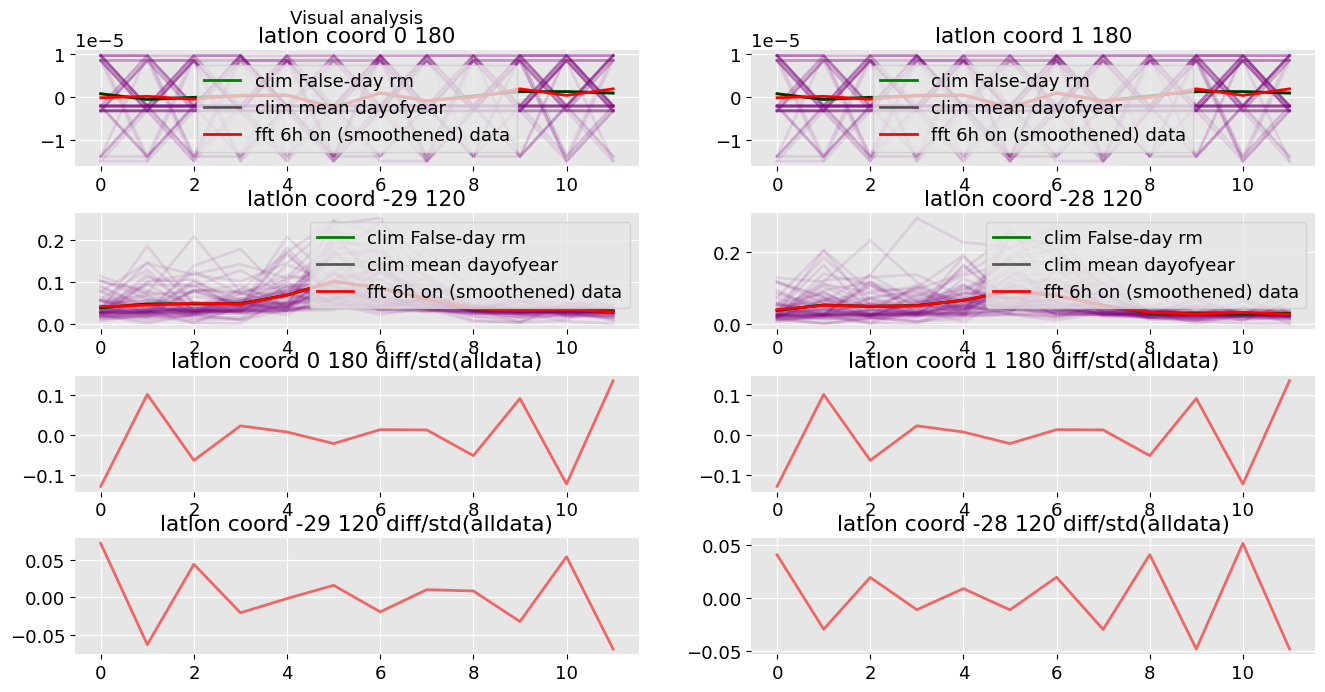

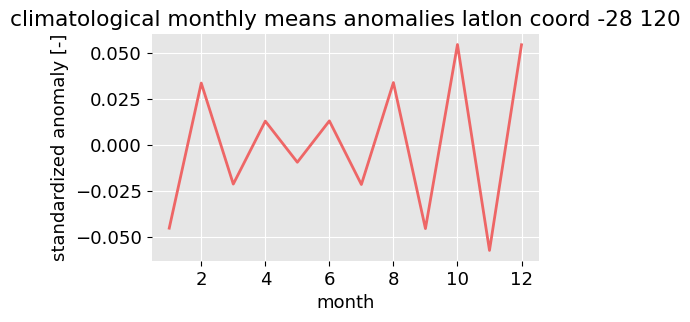

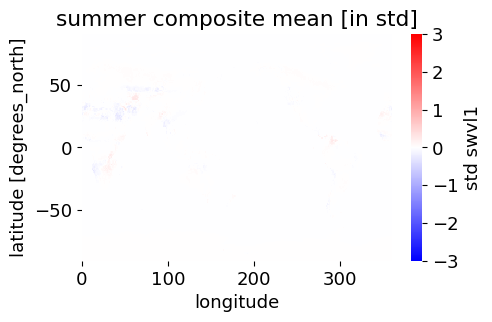

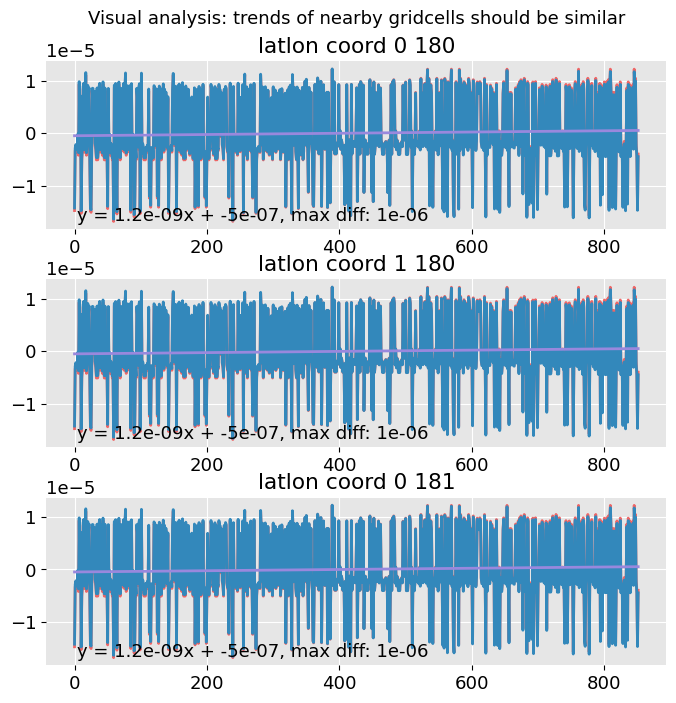

In [28]:
rg.pp_precursors()

In [29]:
rg.list_precur_pp

[('value',
  'C:\\Users\\Van Ingen\\Documents\\Jannes\\School\\VU\\Econometrics\\Thesis\\Data\\preprocessed\\sst_1950-2020_jan_dec_monthly_1.0deg.nc'),
 ('value',
  'C:\\Users\\Van Ingen\\Documents\\Jannes\\School\\VU\\Econometrics\\Thesis\\Data\\preprocessed\\swvl1_1950-2020_jan_dec_monthly_1.0deg.nc')]

clustering fake: 0, n_clusters: 2
clustering fake: 0, n_clusters: 3


Plotting Corr maps sst, split 0, n_clusters 2
Plotting Corr maps sst, split 0, n_clusters 3


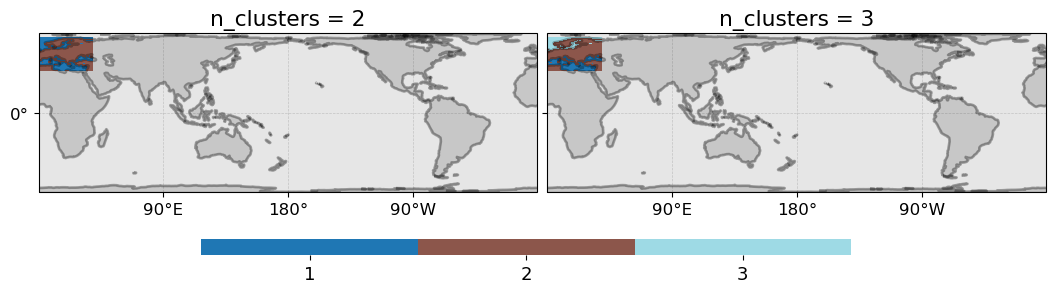

In [32]:
var_filename = rg.list_precur_pp[0][1]
mask = [335.0, 40.0, 32.0, 72.0]
q = 85
n_clusters = [2, 3]
xrclustered, results = cl.dendogram_clustering(var_filename, mask=mask, kwrgs_clust={'q':q, 'n_clusters':n_clusters})
fig = plot_maps.plot_labels(xrclustered, {'col_dim':'n_clusters'})

Plotting Corr maps sst, split 0, eps 90
Plotting Corr maps sst, split 0, eps 100


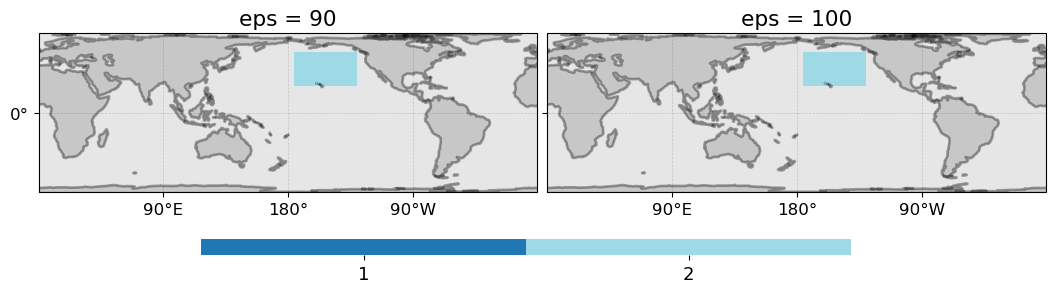

In [33]:
var_filename = rg.list_precur_pp[0][1]
mask = [185.0, 230.0, 20.0, 50.0]
q = 85
xrclustered, results = cl.correlation_clustering(var_filename, mask=mask, clustermethodkey='DBSCAN', kwrgs_clust={'eps':[90, 100]})
xrclustered += 1
fig = plot_maps.plot_labels(xrclustered, {'col_dim':'eps'})



<xarray.DataArray 'sst' (eps: 2, latitude: 5, longitude: 13)>
array([[[nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan]],

       [[nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan]]])
Coordinates:
  * eps        (eps) int64 90 100
  * latitude   (latitude) float64 27.5 32.5 37.5 42.5 47.5
  * longitude  (longitude) float64 177.5 182.5 187.5 192.5 ... 227.5 232.5 237.5
    mask       (latitude, longitude) bool True True True ... True True False
Attributes:
    long_name:     Sea surface temperature
    units:         K
    regridded:     bilinear_2.5d_to_5d
    is_DataArray:  1
    method:        DBSCAN
    kwrgs:         {'eps': [90, 100]}
    target:        sst
    hash:          a3926